# Modeling NYC Community Gardens
From [here](https://data.cityofnewyork.us/Environment/NYC-Greenthumb-Community-Gardens/ajxm-kzmj/data)

need modules for:

- moving files/changing paths
- manipulating data [pandas]
  - reading csv files
- calculations [numpy]
- plotting/visualisations [matplotlib]

In [1]:
# imports matlab and numpy
%pylab inline 
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = r'C:\Users\danielle.leong\Downloads\NYC_Greenthumb_Community_Gardens.csv'
df = pd.read_csv(path)

In [3]:
df.head() 
# size in acres

PropID Boro Community Board  Council District  \
0    NaN    M             M03               2.0   
1    NaN    B             B08              36.0   
2   M382    M             M11               9.0   
3   M331    M             M11               8.0   
4    NaN    M             M03               2.0   

                           Garden Name                    Address   Size  \
0                11 BC Serenity Garden       626 East 11th Street  0.054   
1  1100 Bergen Street Community Garden  1101 & 1105 Bergen Street  0.207   
2       110th Street Block Association        1651 Madison Avenue  0.043   
3        117th Street Community Garden         172 E 117th Street  0.080   
4         11th Street Community Garden       422 East 11th Street  0.054   

  Jurisdiction NeighborhoodName                Cross Streets  
0          DPR     East Village                Avenues B & C  
1          PRI    Crown Heights  Nostrand & New York Avenues  
2          DPR      East Harlem                       Active  
3          DPR      East Harlem                       Active  
4          TPL     East Village        1st Avenue & Avenue A

In [4]:
df.describe()
# seems to be missing values for contract value(?)

Council District        Size
count        495.000000  429.000000
mean          21.060606    0.167056
std           15.278268    0.230718
min            0.000000    0.005000
25%            8.000000    0.057000
50%           17.000000    0.108000
75%           36.000000    0.186000
max           49.000000    2.712000

In [5]:
df.keys()

Index(['PropID', 'Boro', 'Community Board', 'Council District', 'Garden Name',
       'Address', 'Size', 'Jurisdiction', 'NeighborhoodName', 'Cross Streets'],
      dtype='object')

Possible Correlations
- size[cum] + borough
- neighborhood + size[cum]

Need to create new columns/df of cum size

In [6]:
df['NeighborhoodName'].value_counts()

East New York               45
East Village                35
East Harlem                 32
Bed-Stuy                    29
Brownsville                 13
Melrose                     11
Park Slope                   8
Hamilton Heights             8
Harlem                       8
Washington Heights           8
Williamsburg                 7
Upper West Side              7
Crown Heights                7
Lower East Side              7
Highbridge                   6
Bushwick                     5
Morrisania                   5
Red Hook                     5
Coney Island                 5
Prospect Heights             4
Central Harlem               4
West Harlem                  3
Clinton Hill                 3
Jamaica                      3
Far Rockaway                 3
Boerum Hill                  3
Corona                       3
Hell's Kitchen               3
Crotona                      2
Kensington                   2
                            ..
Midtown                      1
Forest H

In [7]:
uNbhdNames = df['NeighborhoodName'].unique()
csize = []
for name in uNbhdNames:
    x = df.loc[df['NeighborhoodName'] == name]
    csize.append(x['Size'].sum())

# mtx = uNbhdNames.join(csize)

In [8]:
uNbhdNames = pd.Series(uNbhdNames)
type(uNbhdNames)
csize = pd.Series(csize)

mergedtable = pd.concat([uNbhdNames, csize], axis = 1)


In [9]:
mergedtable.columns = ['Region', 'Total Area']
mergedtable

Region  Total Area
0               East Village       5.473
1              Crown Heights       1.078
2                East Harlem       3.129
3                        NaN       0.000
4              East New York       6.274
5                 Park Slope       1.368
6                Sunset Park       0.000
7                   Bed-Stuy       3.661
8                     Corona       0.357
9                    Melrose       1.129
10                  Red Hook       0.504
11           Lower East Side       1.377
12              Far Rockaway       0.276
13                   Belmont       0.100
14              Williamsburg       0.573
15                   Jamaica       0.327
16          Hamilton Heights       0.933
17              Clinton Hill       0.298
18         Downtown Brooklyn       0.082
19              Hunt's Point       0.340
20                  Mt. Eden       0.150
21                Morrisania       0.493
22                   Tremont       0.000
23           Cambria Heights       0.207
24                 Wakefield       0.000
25                Mott Haven       0.119
26              West Village       0.110
27            Hell's Kitchen       0.465
28                  Bushwick       0.743
29               Boerum Hill       0.105
..                       ...         ...
38                   Crotona       0.330
39           Upper West Side       0.745
40       Springfield Gardens       0.138
41                Greenpoint       0.000
42                   Midtown       0.000
43             Highland Park       0.410
44  Ocean Hill / Brownsville       0.320
45               Marble Hill       0.000
46                Highbridge       1.309
47         Greenwich Village       0.080
48          Long Island City       0.172
49           Upper East Side       0.000
50                Ozone Park       0.000
51          Prospect Heights       0.268
52             Schuylerville       0.000
53                   Chelsey       0.000
54                  Flushing       0.010
55            North Flatbush       0.000
56        Kingbridge Heights       0.000
57           Grand Concourse       0.000
58            So. Ozone Park       0.000
59          Roosevelt Island       0.000
60          Brooklyn Heights       0.028
61              Forest Hills       0.108
62                    Inwood       0.115
63                West Farms       0.440
64              Coney Island       0.525
65         East Williamsburg       0.114
66       Kingsbridge Heights       0.046
67                 Soundview       0.270

[68 rows x 2 columns]

In [35]:
districts = pd.Series(df['Council District'].unique())
dst_area = []
for dist in districts:
    areas = df.loc[df['Council District'] == dist]
    dst_area.append(areas['Size'].sum)
dst_area = pd.Series(dst_area)
type(dst_area)
type(areas)

pandas.core.frame.DataFrame

In [16]:
dist_cg_sz = pd.concat([districts, dst_area], axis = 1)

Solution for getting based on neighborhood names [here](http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas/17071908#17071908)

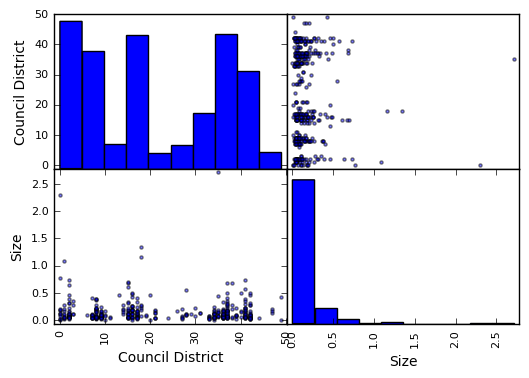

In [14]:
scatter_matrix(df)
plt.show()

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0) 
# missing values

PropID              263
Boro                  0
Community Board       5
Council District     41
Garden Name           0
Address               1
Size                107
Jurisdiction          0
NeighborhoodName    213
Cross Streets        72
dtype: int64

In [20]:
cg_per = df['NeighborhoodName'].value_counts()

In [50]:
valrow = mergedtable.loc[mergedtable['Region']=='Melrose'] # using loc() returns index item, using loc[] returns data
somval = valrow.loc[:,'Total Area']
print(valrow)
print(somval)

    Region  Total Area
9  Melrose       1.129
9    1.129
Name: Total Area, dtype: float64


In [58]:
print(somval + 5)
print(somval.values + 5)

9    6.129
Name: Total Area, dtype: float64
[ 6.129]


In [ ]:
# trying to find average area of community garden based on neighborhood
avg_sz = []
for dist in mergedtable['Region']:
    x = cg_per[dist]
    y = mergedtable.loc[mergedtable['Region'] == dist]
    z = y['Total Area'].sum()
    
    